<a href="https://colab.research.google.com/github/Matheuslanna/Bootcamp-Dados-Modulo01/blob/main/DadosGastosSUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

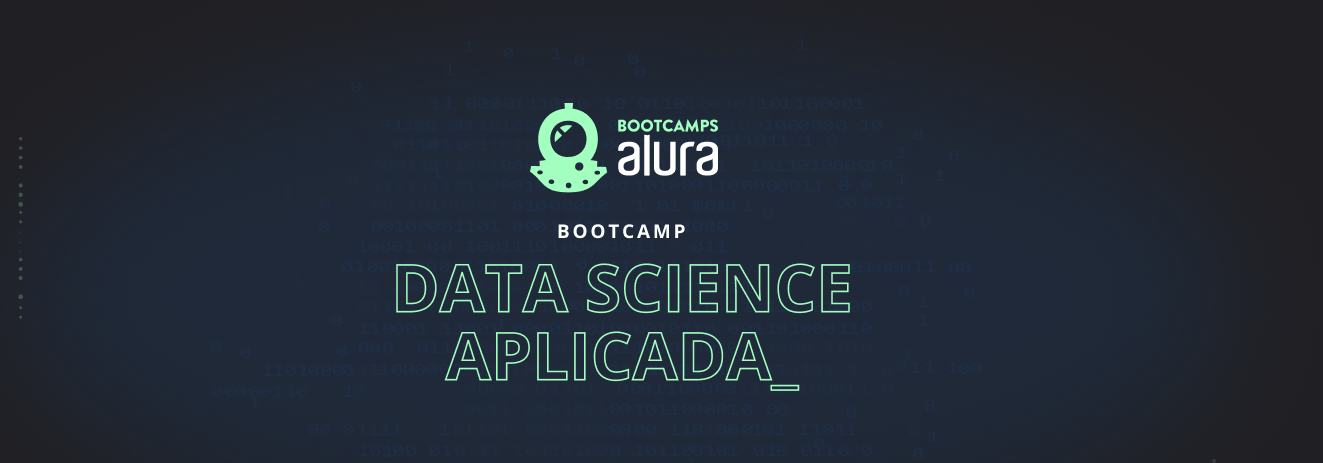


# Análise de Dados do Sistema Único de Saúde (SUS) com Python 

Este projeto servirá como repositório para o primeiro Módulo do BootCamp de Data Science Aplicada da Alura, além de adições propostas pelo autor.

Iremos utilizar dados reais obtidos através do DataSUS TabNet ([DataSUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)).


## Aula 1 - Aquisição e Leitura de Dados Reais

O primeiro passo que iremos fazer é a importação das bibliotecas a serem usadas ao longo deste projeto.

In [2]:
# Bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Em seguida, iremos importar os dados obtidos no DataSUS que usaremos.

In [5]:
dados = pd.read_csv("https://raw.githubusercontent.com/Matheuslanna/Bootcamp-Dados-Modulo01/main/Data/A141522189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3,
                    sep = ";",
                    skipfooter = 12,
                    thousands = ".",
                    decimal = ",",
                    engine = 'python')

Verificação das 5 primeiras e 5 últimas linhas dos dados para verificar sua estruturação

In [6]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [ ]:
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99143937.75,95862593.49,1.030448e+08,98566147.88,94371567.58,96973500.30,91006554.37,88764855.22,97614085.43,85488519.32,84881491.62,76806748.32,87777332.11,96799361.58,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,84404640.00,37798832.80,1.276439e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964922.58,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18654501.49,17877667.41,17395566.03,15854121.13,17502042.14,19724932.28,2.363994e+07,2.260835e+07,2.151915e+07,2.182500e+07,2.141867e+07,2.138701e+07,1.602779e+07,11428462.42,4035989.77,2.324525e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,2.068157e+07,2.093614e+07,2.017620e+07,2.038794e+07,1.831662e+07,1.885285e+07,1.589053e+07,13207979.82,8835890.09,2.180120e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33774725.23,30951957.24,34889685.12,33793945.19,36429187.65,33535245.30,35400045.71,35408697.61,33813397.64,36064816.74,34904539.36,34092381.28,34795831.02,33292972.66,34964737.78,36236325.32,37829806.86,35400944.86,3.650255e+07,38533573.53,36415308.03,37217715.53,36302392.68,34078918.26,36432399.98,34248522.76,34808037.62,28760754.83,35104476.04,38888207.13,4.587133e+07,4.756816e+07,4.795133e+07,4.530484e+07,3.978541e+07,3.761425e+07,3.565589e+07,32253788.65,24867001.02,4.973572e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429251.56,18249176.79,19623112.14,18164306.94,21657768.52,25045580.62,2.642848e+07,2.387530e+07,2.177187e+07,2.308759e+07,2.066853e+07,2.255203e+07,2.257387e+07,19004029.87,14731938.43,2.592423e+09


Verificação de algumas informações do dataset, como tipos de variável e formatação.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


In [ ]:
dados.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Dez    5.377291e+07
2021/Jan    4.947411e+07
2021/Fev    3.899242e+07
2021/Mar    2.416371e+07
Total       6.388206e+09
Length: 165, dtype: float64

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

Verificação de dados de um estado específico.

In [ ]:
dados.loc[dados['Unidade da Federação'] == "31 Minas Gerais"]

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
16,31 Minas Gerais,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3590.36,4629.85,-,...,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,20418737536.66


Verificação de dados do mês mais atual.

In [ ]:
dados[["Unidade da Federação","2021/Mar"]]

,Unidade da Federação,2021/Mar
0,11 Rondônia,4732441.04
1,12 Acre,1137341.65
2,13 Amazonas,6799060.80
3,14 Roraima,2381844.31
4,15 Pará,13069564.31
5,16 Amapá,989155.40
6,17 Tocantins,928756.84
7,21 Maranhão,17294509.11
8,22 Piauí,9542151.53
9,23 Ceará,17173151.55


## Aula 2 - Visualização de Dados

### Desafio - escolher um título mais descritivo, que passe a mensagem adequada.



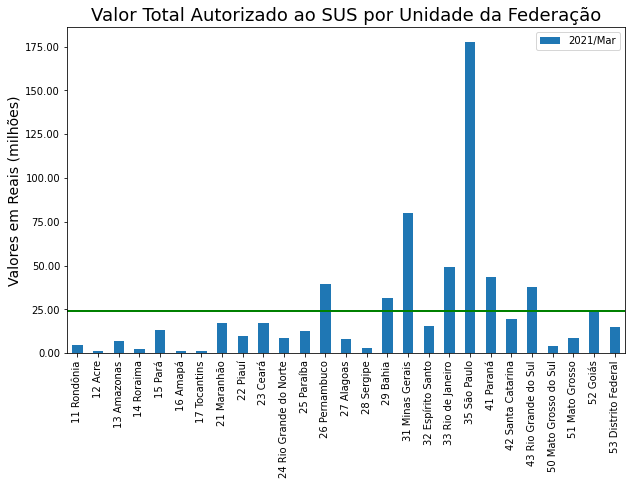

In [ ]:
ax = dados.plot(x = 'Unidade da Federação', 
                y = '2021/Mar',
                kind = "bar",
                figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + '')) 

plt.title('Valor Total Autorizado ao SUS por Unidade da Federação',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Valores em Reais (milhões)',
           fontsize = 14)
ax.axhline(dados['2021/Mar'].mean(), color='green', linewidth=2)
plt.show()

### Desafio -  mudar palete de cores com o matplotlib

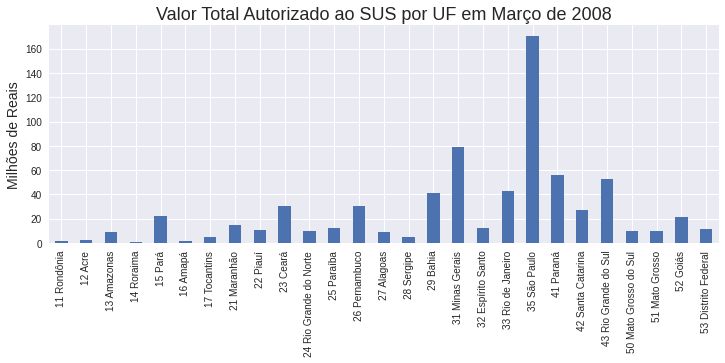

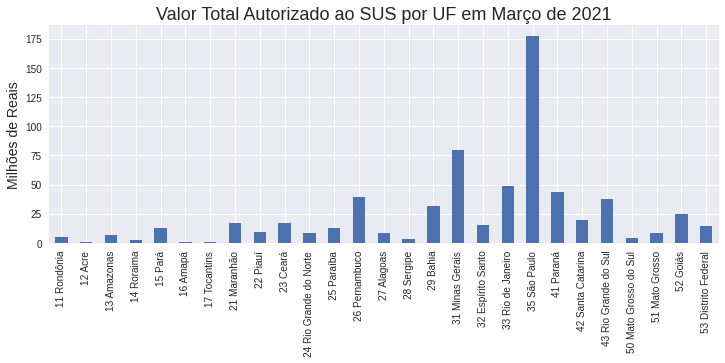

In [ ]:
plt.style.use('seaborn')
ax1 = dados.plot(x = 'Unidade da Federação', 
                 y = '2008/Mar',
                 kind = "bar",
                 figsize = (12,4),
                 legend=None)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/10**6)))
plt.title('Valor Total Autorizado ao SUS por UF em Março de 2008',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Milhões de Reais',
           fontsize = 14)

ax2 = dados.plot(x = 'Unidade da Federação', 
                 y = '2021/Mar',
                 kind = "bar",
                 figsize = (12,4),
                 legend=None)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/10**6)))
plt.title('Valor Total Autorizado ao SUS por UF em Março de 2021',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Milhões de Reais',
           fontsize = 14)

plt.show()

In [ ]:
dados[["Unidade da Federação","2008/Ago","2008/Set"]].head()

,Unidade da Federação,2008/Ago,2008/Set
0,11 Rondônia,2938286.29,2843930.91
1,12 Acre,1886871.84,2084884.80
2,13 Amazonas,8331763.97,8148089.92
3,14 Roraima,1045291.11,1003740.89
4,15 Pará,23259148.28,23667690.01


Remoção de datas que não possuem dados usáveis.

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [ ]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [ ]:
usaveis['2021/Mar'].head()

Unidade da Federação
11 Rondônia    4732441.04
12 Acre        1137341.65
13 Amazonas    6799060.80
14 Roraima     2381844.31
15 Pará       13069564.31
Name: 2021/Mar, dtype: float64

In [ ]:
usaveis['2021/Mar'].tail()

Unidade da Federação
43 Rio Grande do Sul    37798832.80
50 Mato Grosso do Sul    4035989.77
51 Mato Grosso           8835890.09
52 Goiás                24867001.02
53 Distrito Federal     14731938.43
Name: 2021/Mar, dtype: float64

In [ ]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

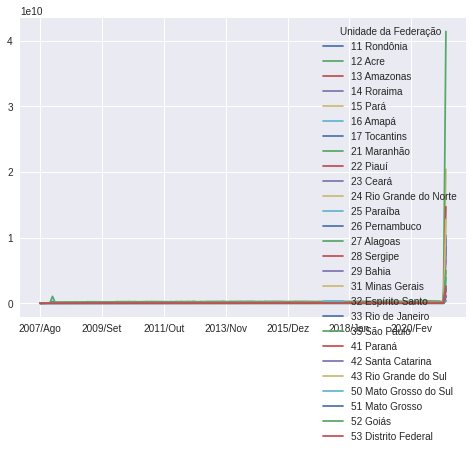

In [ ]:
usaveis.T.plot()

### Remoção da coluna "Total" que deforma o gráfico por ser um valor muito maior que os outros

In [ ]:
usaveis = usaveis.drop("Total",axis=1)
usaveis.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.31,69933577.14,66486835.62,69108367.47,67570770.09,70074754.73,70884009.17,65079794.92,66556015.62,66097030.85,...,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99143937.75,95862593.49,103044767.94,98566147.88,94371567.58,96973500.30,91006554.37,88764855.22,97614085.43,85488519.32,84881491.62,76806748.32,87777332.11,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,10257782.00,10167827.24,9602843.49,10272466.74,10814111.53,10371654.90,9140959.80,9771575.46,9648706.17,11784290.10,11240770.37,11155445.90,11796784.62,11956687.54,12420336.71,11489768.73,11698487.88,11286787.17,10814729.24,11570718.38,10920760.16,13204085.81,11711475.20,12671896.78,12584046.80,11808910.05,12917152.45,12429678.06,12526681.04,12305360.94,...,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964922.58,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18654501.49,17877667.41,17395566.03,15854121.13,17502042.14,19724932.28,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,20681571.71,20936140.39,20176196.43,20387936.40,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,75039013.46,18149374.27,20992213.03,21049477.30,19162546.79,20362996.88,20022472.33,21054991.27,21410602.15,20610541.50,19940725.98,19343787.54,20817880.66,20215479.18,24174119.21,22943952.73,2378

### Desafio - reposicionar a legenda. Dentro? Fora? Onde?

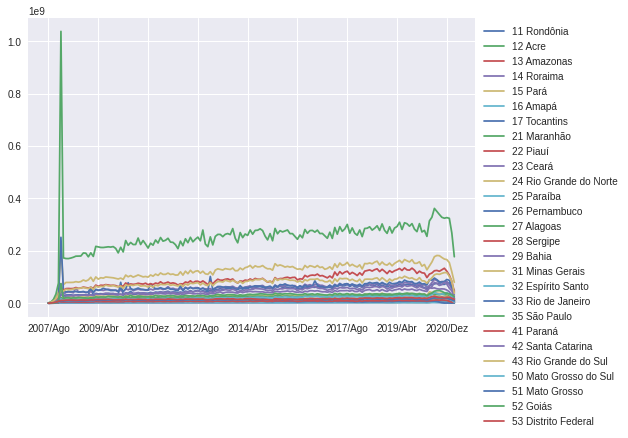

In [ ]:
ax = usaveis.T.plot()
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

## Aula 3 - Manipulação dos dados

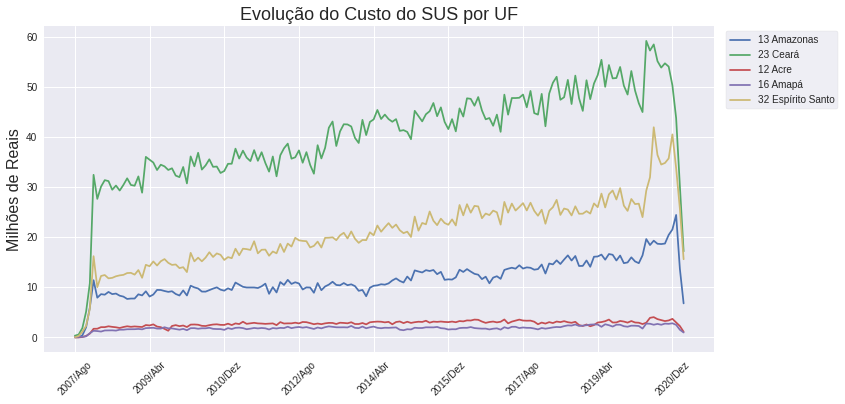

In [ ]:
np.random.seed(7)
usaveis_random = usaveis.sample(n = 5)
ax = usaveis_random.T.plot(figsize = (12,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000)))
plt.title('Evolução do Custo do SUS por UF',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Milhões de Reais',
           fontsize = 16)
ax.legend(bbox_to_anchor=(1.01, 1),frameon=True)
plt.rc('xtick', labelsize=12)
plt.xticks(rotation=45) 

plt.show()

In [ ]:
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

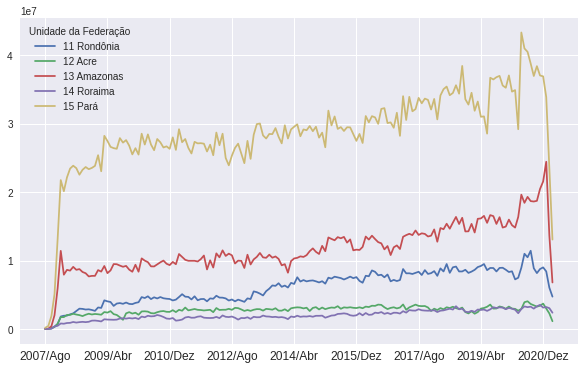

In [ ]:
usaveis[:5].T.plot(figsize=(10,6))

### Agora iremos reordenar as linhas de estado pelo total de custo ao longo dos anos.

In [ ]:
usaveis["Total"] = usaveis.sum(axis = 1)
ordenado_por_total = usaveis.sort_values("Total", ascending = False)
ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

### Desafio - Determinar a região de cada estado e criar uma nova coluna

In [ ]:
regiao = []                                                                       # Criação da lista para a região
for i in range (len(ordenado_por_total)):                                                    # For Loop para verificar primeiro digito do estado
  if int((ordenado_por_total.index[i][0])) == 1:                                             # Atribuir Região para cada número
   regiao.append("Norte")
  elif int((ordenado_por_total.index[i][0])) == 2:
   regiao.append("Nordeste")
  elif int((ordenado_por_total.index[i][0])) == 3:
   regiao.append("Sudeste")
  elif int((ordenado_por_total.index[i][0])) == 4:
   regiao.append("Sul")
  else:
   regiao.append("Centro-Oeste")
regiao = np.array([regiao])                                                      # Transforma lista em array
ordenado_por_total_reg = ordenado_por_total                                                          # Importa o df 
ordenado_por_total_reg["Região"] = regiao.T                                                 # Adiciona a coluna de região ao final 
ordenado_por_total_reg = ordenado_por_total_reg[ ['Região'] + [ col for col in ordenado_por_total_reg.columns if col != 'Região' ] ] # Transfere a coluna Região para o inicio do df
ordenado_por_total = ordenado_por_total.drop("Região", axis = 1)
ordenado_por_total_reg.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,Sul,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52

Text(0, 0.5, 'Milhões de Reais')

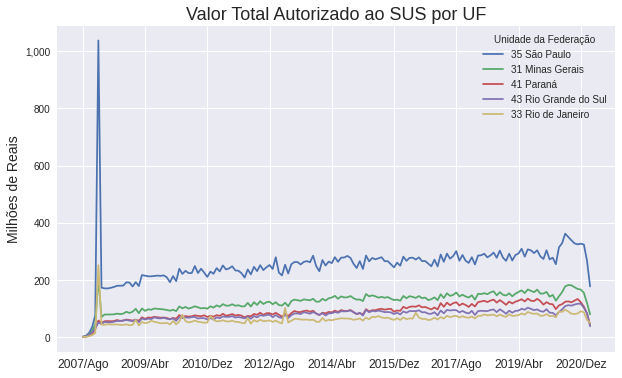

In [ ]:
ax = ordenado_por_total.head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/10**6)))
plt.title('Valor Total Autorizado ao SUS por UF',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Milhões de Reais',
           fontsize = 14)

### Desafio - Acrescentar um novo estado ao gráfico e retirar os dados distorcidos, anteriores a abr/2008.

In [ ]:
df_distorcidos =['2007/Ago','2007/Nov','2007/Dez','2008/Jan','2021/Jan','2021/Fev','2021/Mar']
ordenado_por_total_red = ordenado_por_total[ordenado_por_total.columns[~ordenado_por_total.columns.isin(df_distorcidos)]]
ordenado_por_total_red.head()

,2007/Set,2007/Out,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,4434168.64,14577395.84,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,...,267354892.42,287435651.36,267262034.09,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95
31 Minas Gerais,2861781.50,10018011.35,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,...,142294086.35,148327161.77,142323944.76,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67
41 Paraná,1431708.01,4630402.44,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,...,110720806.09,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92
43 Rio Grande do Sul,3182913.14,8571312.11,45897704.82,52928695.92,51972416.

Aqui iremos escolher os 5 estados com maior custo total repassado ao SUS e um estado escolhido, sendo este o estado da Bahia.

In [ ]:
ordenado_por_total_escolhidos = ordenado_por_total_red.head(5)
ordenado_por_total_escolhidos = ordenado_por_total_escolhidos.append(ordenado_por_total_red.loc["29 Bahia"])


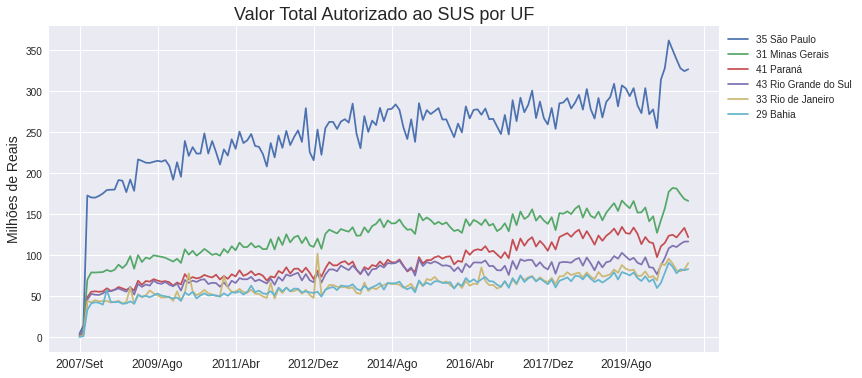

In [ ]:
ax = ordenado_por_total_escolhidos.T.plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/10**6)))
plt.title('Valor Total Autorizado ao SUS por UF',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Milhões de Reais',
           fontsize = 14)
ax.legend(bbox_to_anchor=(1, 1))

### Outra proposta de Slice nos dados para retirada dos dados distorcidos.

In [ ]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total[colunas_interessadas].head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53

### Desafio - Comparação entre os dados de gastos no SUS no Rio de Janeiro com os dados de dengue no estado.

In [7]:
dengue_rj_1 = pd.read_csv("https://raw.githubusercontent.com/Matheuslanna/Bootcamp-Dados-Modulo01/main/Data/dengue_ano_mes_ate2013.csv", encoding="ISO-8859-1", 
                    skiprows = 4,
                    sep = ";",
                    skipfooter = 17,
                    thousands = ".",
                    decimal = ",",
                    engine = 'python')

dengue_rj_2 = pd.read_csv("https://raw.githubusercontent.com/Matheuslanna/Bootcamp-Dados-Modulo01/main/Data/dengue_ano_mes_pos2013.csv", encoding="ISO-8859-1", 
                    skiprows = 4,
                    sep = ";",
                    skipfooter = 19,
                    thousands = ".",
                    decimal = ",",
                    engine = 'python')

Como o ano de 2013 se repete nos dois datasets, iremos excluir este ano da segunda parte.

In [8]:
dengue_rj_2 = dengue_rj_2.iloc[1:]
dengue_rj_2

,Ano Notificação,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
1,2014,319,207,137,141,135,186,117,96,85,131,87,230,1871
2,2015,2086,2191,4357,4742,4367,2692,1871,1455,997,681,1099,2721,29259
3,2016,5749,4835,3188,3115,1666,727,591,284,119,189,313,344,21120
4,2017,480,374,339,358,234,156,121,105,106,166,144,155,2738
5,2018,293,300,492,683,750,409,312,196,144,162,151,290,4182
6,2019,500,434,1282,3343,4875,2069,948,354,222,165,142,160,14494
7,2020,327,295,169,88,77,42,60,52,42,28,17,21,1218


Em posse dos dois datasets, o primeiro indo de 2008 até 2013, e o segundo de 2014 até 2020, podemos concatenar as duas tabelas, visto que ambas possuem os meses como coluna e o ano como linha.

In [ ]:
dengue_rj = dengue_rj_1.tail(6)
dengue_rj = dengue_rj.append(dengue_rj_2.tail(7),ignore_index = True)
dengue_rj = dengue_rj.set_index('Ano Notificação')
dengue_rj = dengue_rj.drop("Total",axis=1)
dengue_rj

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano Notificação,,,,,,,,,,,,
2008,3193,5600,14682,19272,6387,1655,590,279,184,295,238,312
2009,447,463,595,435,396,245,87,40,41,18,63,210
2010,807,744,1008,2011,3198,1772,871,607,473,193,280,666
2011,1969,7634,15326,21697,16151,5012,1417,811,457,960,1248,1519
2012,1199,1352,3450,6995,6139,2668,1126,590,419,247,356,629
2013,3391,5481,11729,10233,5351,1190,363,250,245,202,109,120
2014,319,207,137,141,135,186,117,96,85,131,87,230
2015,2086,2191,4357,4742,4367,2692,1871,1455,997,681,1099,2721
2016,5749,4835,3188,3115,1666,727,591,284,119,189,313,344


In [ ]:
dengue_rj = pd.DataFrame(dengue_rj.values.reshape(1, -1))

In [ ]:
datas = pd.date_range('2008-01-01','2020-12-01', freq='MS').strftime("%b-%Y")

In [ ]:
dengue_rj.columns = datas
dengue_rj

,Jan-2008,Feb-2008,Mar-2008,Apr-2008,May-2008,Jun-2008,Jul-2008,Aug-2008,Sep-2008,Oct-2008,Nov-2008,Dec-2008,Jan-2009,Feb-2009,Mar-2009,Apr-2009,May-2009,Jun-2009,Jul-2009,Aug-2009,Sep-2009,Oct-2009,Nov-2009,Dec-2009,Jan-2010,Feb-2010,Mar-2010,Apr-2010,May-2010,Jun-2010,Jul-2010,Aug-2010,Sep-2010,Oct-2010,Nov-2010,Dec-2010,Jan-2011,Feb-2011,Mar-2011,Apr-2011,...,Sep-2017,Oct-2017,Nov-2017,Dec-2017,Jan-2018,Feb-2018,Mar-2018,Apr-2018,May-2018,Jun-2018,Jul-2018,Aug-2018,Sep-2018,Oct-2018,Nov-2018,Dec-2018,Jan-2019,Feb-2019,Mar-2019,Apr-2019,May-2019,Jun-2019,Jul-2019,Aug-2019,Sep-2019,Oct-2019,Nov-2019,Dec-2019,Jan-2020,Feb-2020,Mar-2020,Apr-2020,May-2020,Jun-2020,Jul-2020,Aug-2020,Sep-2020,Oct-2020,Nov-2020,Dec-2020
0,3193,5600,14682,19272,6387,1655,590,279,184,295,238,312,447,463,595,435,396,245,87,40,41,18,63,210,807,744,1008,2011,3198,1772,871,607,473,193,280,666,1969,7634,15326,21697,...,106,166,144,155,293,300,492,683,750,409,312,196,144,162,151,290,500,434,1282,3343,4875,2069,948,354,222,165,142,160,327,295,169,88,77,42,60,52,42,28,17,21


In [ ]:
dengue_rj = dengue_rj.T.reset_index()

In [ ]:
dengue_rj.columns = ['Data','Casos']

In [ ]:
#dengue_rj['Data'] = dengue_rj['Data'].astype('|S')
dengue_rj['Data'] = pd.to_datetime(dengue_rj['Data'],format="%b-%Y")

In [ ]:
dengue_rj['Casos'] = pd.to_numeric(dengue_rj['Casos'])

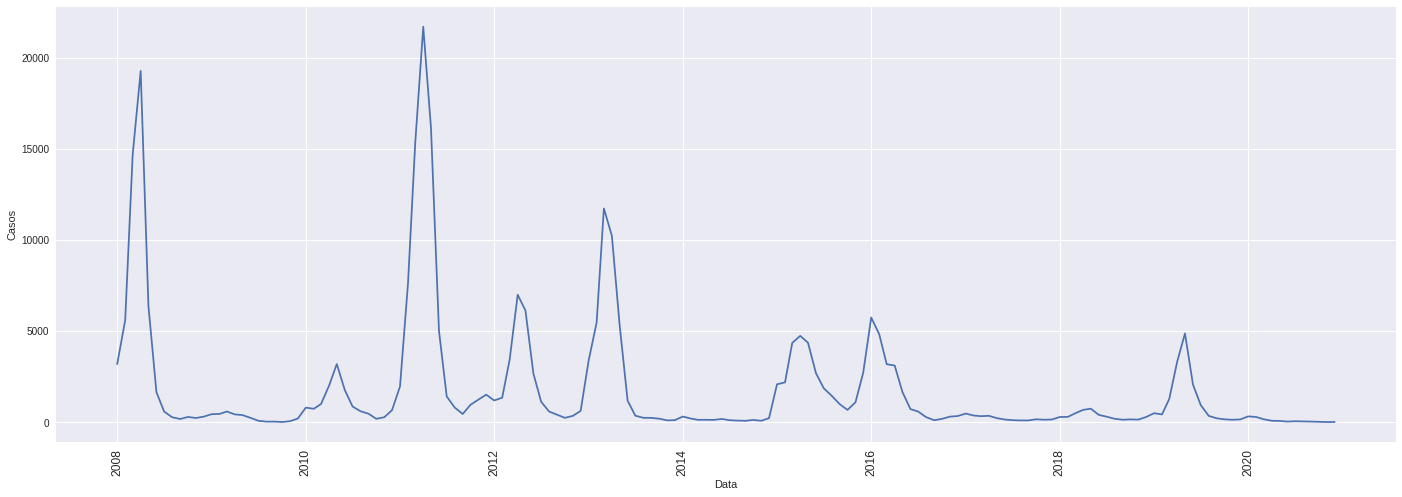

In [ ]:
plt.figure(figsize=(24,8))
ax = sns.lineplot(data=dengue_rj, x="Data", y="Casos")
plt.xticks(rotation=90) 
plt.show()

### Desafio - Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se o pico de 2013/Fev teve comportamento similar em todos os demais estados da região

In [ ]:
#ordenado_por_total_reg.loc(ordenado_por_total_reg['Região'] == "Sudeste")
ordenado_por_total_sudeste = ordenado_por_total_reg[lambda x: x['Região'] == "Sudeste"]
ordenado_por_total_sudeste = ordenado_por_total_sudeste.drop("Região",axis=1)
df_distorcidos =['2012/Nov','2012/Dez','2013/Jan','2013/Fev','2013/Mar','2013/Abr','2013/Maio','2013/Jun']
ordenado_por_total_sudeste = ordenado_por_total_sudeste[ordenado_por_total_sudeste.columns[ordenado_por_total_sudeste.columns.isin(df_distorcidos)]]

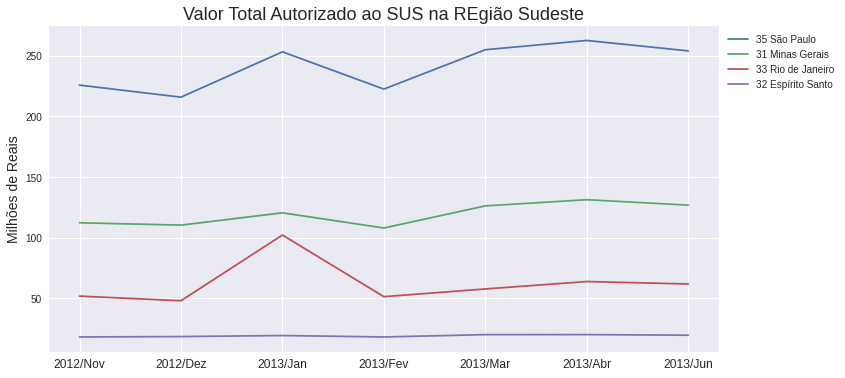

In [ ]:
ax = ordenado_por_total_sudeste.T.plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/10**6)))
plt.title('Valor Total Autorizado ao SUS na REgião Sudeste',
          fontsize = 18)
plt.xlabel('')
plt.ylabel('Milhões de Reais',
           fontsize = 14)
ax.legend(bbox_to_anchor=(1, 1))

Comp podemos perceber, os estados de São Paulo e Rio de Janeiro possuem um pico maior em janeiro de 2013, enquanto Minas Gerais apresenta um leve aumento e o Espírito Santo permance estável.

## Aula 4 - Análise de Gráficos e Criação de Hipóteses

Primeiro iremos simplificar e trazer os dados brutos em reais, para a unidade de milhões.

In [ ]:
ordenado_por_total = ordenado_por_total/1000000

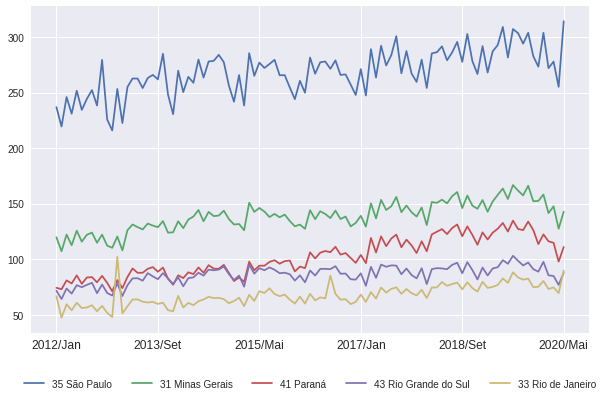

In [ ]:
meses_filtrados = ordenado_por_total.columns[53:154]
ax = ordenado_por_total[meses_filtrados].head(5).T.plot(figsize=(10,6))
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 5)

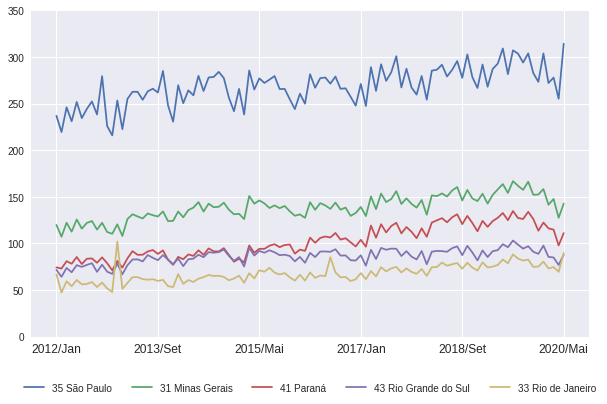

In [ ]:
meses_filtrados = ordenado_por_total.columns[53:154]
ax = ordenado_por_total[meses_filtrados].head(5).T.plot(figsize=(10,6))
plt.ylim(0,350)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 5)

### Viés nas análises

Nesta aula vimos que não só os dados selecionados, como o tipo de gráfico usado, como os intervalos utilizados podem influenciar na interpretação e forçar uma certa narrativa. A própria coleta de dados pode introduzir um certo viés na análise, se a amostra coletada não for tratada corretamente.

Portanto, devemos tomaar cuidado em sempre dar uma visão imparcial e mais próxima da realidade possível.


## Aula 5 - Manipulação e Interpretação de Dados

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Mar'

In [ ]:
gastos_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mais_recente

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64

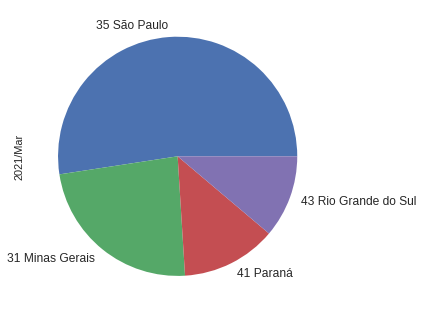

In [ ]:
gastos_mais_recente.plot(kind = 'pie')

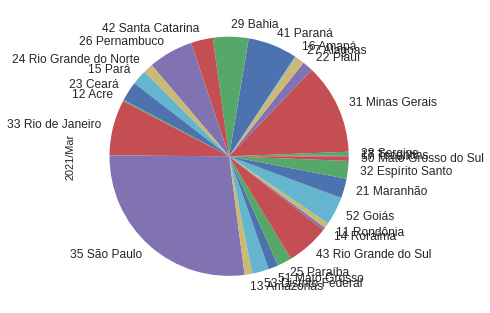

In [ ]:
gastos_mais_recente.sample(frac = 1).plot(kind = 'pie')

Iremos agora calcular o valor gasto relativo ao estado de Minas Gerais. Se um estado gastou o dobro, terá valor relativo de 2, se gastou metade, 0,5, e assim por diante.

In [ ]:
gastos_mais_recente / gastos_mais_recente.loc["31 Minas Gerais"]

Unidade da Federação
35 São Paulo             2.22
31 Minas Gerais          1.00
41 Paraná                0.55
43 Rio Grande do Sul     0.47
33 Rio de Janeiro        0.62
29 Bahia                 0.39
26 Pernambuco            0.49
42 Santa Catarina        0.24
23 Ceará                 0.22
52 Goiás                 0.31
15 Pará                  0.16
21 Maranhão              0.22
32 Espírito Santo        0.20
24 Rio Grande do Norte   0.11
25 Paraíba               0.16
53 Distrito Federal      0.18
50 Mato Grosso do Sul    0.05
22 Piauí                 0.12
27 Alagoas               0.10
51 Mato Grosso           0.11
13 Amazonas              0.09
28 Sergipe               0.04
17 Tocantins             0.01
11 Rondônia              0.06
12 Acre                  0.01
14 Roraima               0.03
16 Amapá                 0.01
Name: 2021/Mar, dtype: float64

In [ ]:
gastos_mais_recente.sort_values(ascending=False).head(5) / gastos_mais_recente.loc["31 Minas Gerais"]

Unidade da Federação
35 São Paulo        2.22
31 Minas Gerais     1.00
33 Rio de Janeiro   0.62
41 Paraná           0.55
26 Pernambuco       0.49
Name: 2021/Mar, dtype: float64

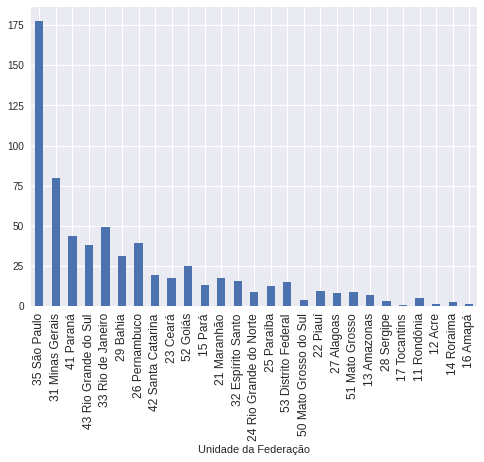

In [ ]:
gastos_mais_recente.plot(kind='bar')
plt.show()

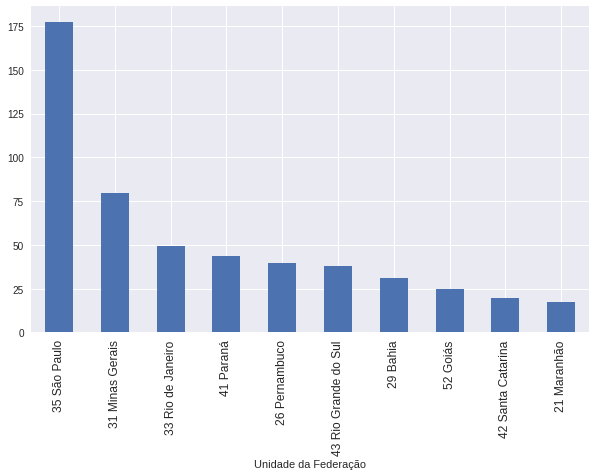

In [ ]:
gastos_mais_recente.sort_values(ascending = False).head(10).plot(kind='bar', figsize = (10,6))
plt.show()

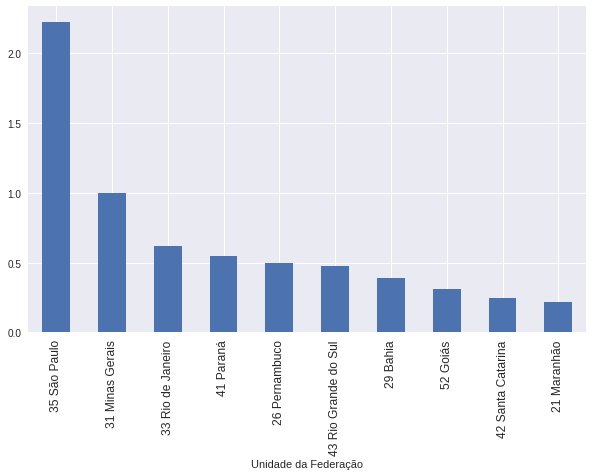

In [ ]:
gastos_mais_recentes_relativo = gastos_mais_recente.sort_values(ascending=False) / gastos_mais_recente.loc["31 Minas Gerais"]
gastos_mais_recentes_relativo.sort_values(ascending = False).head(10).plot(kind='bar', figsize = (10,6))
plt.show()

### Desafio - Gasto por população da UF

Iremos inicialmente pegar os dados populacionais por estado no site do  [IBGE](https://www.ibge.gov.br/cidades-e-estados) e copiar diretamente visto que são poucos dados.


In [ ]:
gastos_mais_recente = gastos_mais_recente.reset_index()
gastos_mais_recente["Unidade da Federação"] = gastos_mais_recente["Unidade da Federação"].apply(lambda x: x[2:])
gastos_mais_recente = gastos_mais_recente.sort_values(by="Unidade da Federação")
gastos_mais_recente = gastos_mais_recente.reset_index(drop=True)
gastos_mais_recente

,Unidade da Federação,2021/Mar
0,Acre,1.14
1,Alagoas,8.18
2,Amapá,0.99
3,Amazonas,6.80
4,Bahia,31.31
5,Ceará,17.17
6,Distrito Federal,14.73
7,Espírito Santo,15.61
8,Goiás,24.87
9,Maranhão,17.29


In [9]:
dados_pop = pd.read_csv("https://raw.githubusercontent.com/Matheuslanna/Bootcamp-Dados-Modulo01/main/Data/dados_pop.csv", encoding="ISO-8859-1", 
                    skiprows = 2,
                    sep = ";",
                    skipfooter = 15,
                    thousands = ".",
                    decimal = ",",
                    engine = 'python')

In [ ]:
dados_pop.head()

,UF [-],Código [-],Gentílico [-],Governador [2019],Capital [2010],Área Territorial - km² [2020],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matri?culas no ensino fundamental - matrículas [2018],IDH <span>I?ndice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2020],Total de veículos - veículos [2020]
0,Acre,12,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.43,894470,4.47,157646,0.66,6632883.11,6084416.81,917,306258
1,Alagoas,27,alagoano,JOSE RENAN VASCONCELOS CALHEIROS FILHO,Maceió,27830.66,3351543,112.33,490587,0.63,11950438.46,10460634.92,796,930933
2,Amapá,16,amapaense,ANTONIO WALDEZ GÓES DA SILVA,Macapá,142470.76,861773,4.69,136185,0.71,5396417.14,4224464.09,893,215330
3,Amazonas,13,amazonense,WILSON MIRANDA LIMA,Manaus,1559167.88,4207714,2.23,705007,0.67,17328459.43,15324896.56,852,969722
4,Bahia,29,baiano,RUI COSTA DOS SANTOS,Salvador,564760.43,14930634,24.82,2034711,0.66,50191003.24,45570160.00,965,4506825


In [ ]:
usaveis_pop = dados_pop[["UF [-]","População estimada - pessoas [2020]"]]
usaveis_pop = usaveis_pop.rename(columns={'UF [-]': 'Unidade da Federação'})
usaveis_pop.head()

,Unidade da Federação,População estimada - pessoas [2020]
0,Acre,894470
1,Alagoas,3351543
2,Amapá,861773
3,Amazonas,4207714
4,Bahia,14930634


In [ ]:
usaveis_pop = usaveis_pop.sort_values(by="Unidade da Federação")
usaveis_pop = usaveis_pop.reset_index(drop=True)

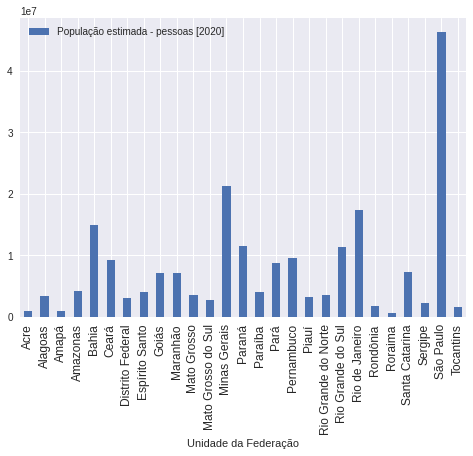

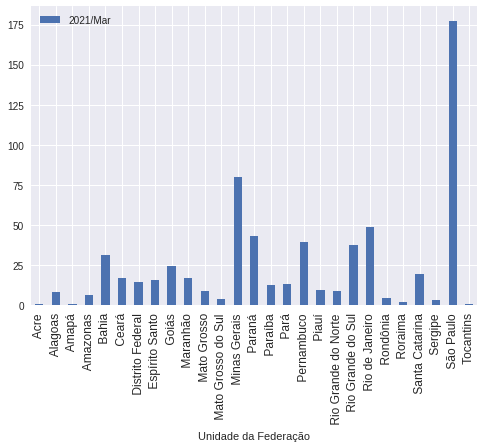

In [ ]:
usaveis_pop.plot(x='Unidade da Federação',y='População estimada - pessoas [2020]', kind='bar')
gastos_mais_recente.plot(x='Unidade da Federação',y='2021/Mar', kind='bar')

In [362]:
gasto_pop = pd.concat([gastos_mais_recente,usaveis_pop.drop("Unidade da Federação",axis=1)], axis=1)
gasto_pop.head()

,Unidade da Federação,2021/Mar,População estimada - pessoas [2020]
0,Acre,1.14,894470
1,Alagoas,8.18,3351543
2,Amapá,0.99,861773
3,Amazonas,6.80,4207714
4,Bahia,31.31,14930634


In [374]:
gasto_pop['População estimada - pessoas [2020]'] = gasto_pop['População estimada - pessoas [2020]']/1000000

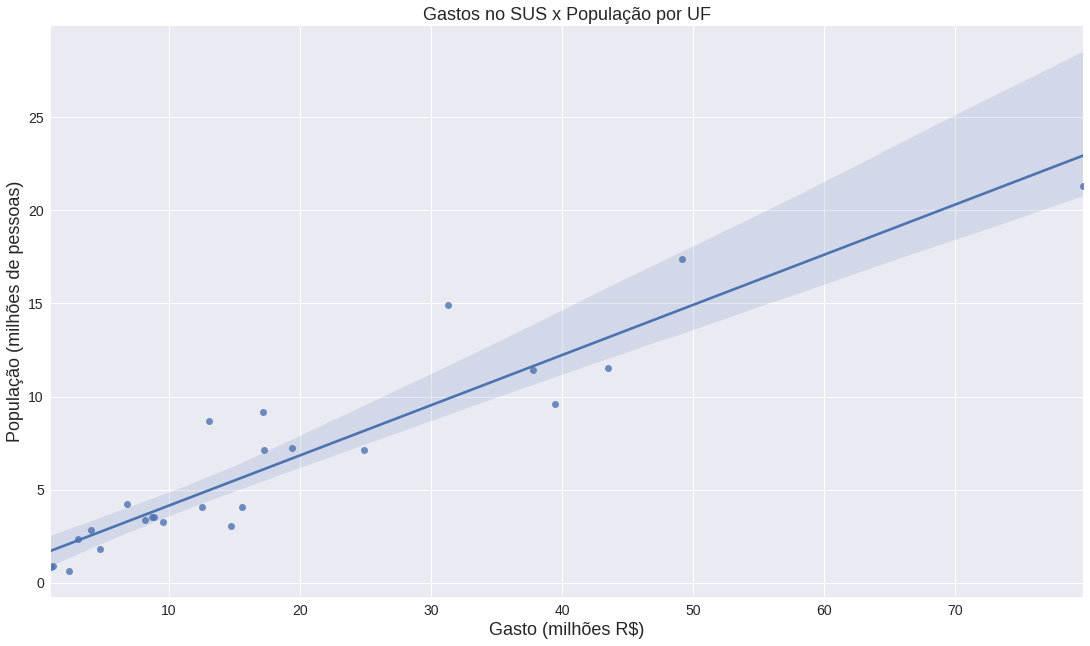

In [392]:
g = sns.regplot(data=gasto_pop[:25], 
                x = "2021/Mar", 
                y = "População estimada - pessoas [2020]")
g.figure.set_size_inches(18.5, 10.5)
plt.title('Gastos no SUS x População por UF',
          fontsize = 18)
plt.xlabel('Gasto (milhões R$)',
           fontsize = 18)
plt.ylabel('População (milhões de pessoas)',
           fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()